In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
df=pd.read_csv('datatest2.txt')

In [3]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [4]:
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [7]:
df['Date']=df['date'].str.split(' ').str[0]

In [8]:
df['Time']=df['date'].str.split(' ').str[1]

In [9]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Date,Time
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,2015-02-11,14:48:00
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,2015-02-11,14:49:00
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,2015-02-11,14:50:00
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,2015-02-11,14:51:00
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,2015-02-11,14:51:59


In [10]:
df.drop('date',axis=1,inplace=True)

In [11]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Date,Time
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1,2015-02-11,14:48:00
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1,2015-02-11,14:49:00
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1,2015-02-11,14:50:00
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1,2015-02-11,14:51:00
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1,2015-02-11,14:51:59


In [12]:
df['year']=df['Date'].str.split('-').str[0]

In [13]:
df['Month']=df['Date'].str.split('-').str[1]

In [14]:
df['date']=df['Date'].str.split('-').str[2]

In [15]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Date,Time,year,Month,date
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1,2015-02-11,14:48:00,2015,02,11
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1,2015-02-11,14:49:00,2015,02,11
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1,2015-02-11,14:50:00,2015,02,11
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1,2015-02-11,14:51:00,2015,02,11
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1,2015-02-11,14:51:59,2015,02,11


In [16]:
df.drop('Date',axis=1,inplace=True)

In [17]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Time,year,Month,date
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1,14:48:00,2015,02,11
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1,14:49:00,2015,02,11
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1,14:50:00,2015,02,11
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1,14:51:00,2015,02,11
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1,14:51:59,2015,02,11


In [18]:
df['Hours']=df['Time'].str.split(':').str[0]

In [19]:
df['Minutes']=df['Time'].str.split(':').str[1]
df['Seconds']=df['Time'].str.split(':').str[2]

In [20]:
df.drop('Time',axis=1,inplace=True)

In [21]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,Month,date,Hours,Minutes,Seconds
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1,2015,02,11,14,48,00
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1,2015,02,11,14,49,00
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1,2015,02,11,14,50,00
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1,2015,02,11,14,51,00
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1,2015,02,11,14,51,59


In [22]:
df['year']=df['year'].astype('int')
df['Month']=df['Month'].astype('int')
df['date']=df['date'].astype('int')
df['Hours']=df['Hours'].astype('int')
df['Minutes']=df['Minutes'].astype('int')
df['Seconds']=df['Seconds'].astype('int')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9752 entries, 1 to 9752
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    9752 non-null   float64
 1   Humidity       9752 non-null   float64
 2   Light          9752 non-null   float64
 3   CO2            9752 non-null   float64
 4   HumidityRatio  9752 non-null   float64
 5   Occupancy      9752 non-null   int64  
 6   year           9752 non-null   int32  
 7   Month          9752 non-null   int32  
 8   date           9752 non-null   int32  
 9   Hours          9752 non-null   int32  
 10  Minutes        9752 non-null   int32  
 11  Seconds        9752 non-null   int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 761.9 KB


In [24]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,Month,date,Hours,Minutes,Seconds
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.0,9752.0,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111,2015.0,2.0,14.502871,11.492412,29.509639,18.355824
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408,0.0,0.0,1.995326,7.031402,17.324981,27.315451
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000,2015.0,2.0,11.000000,0.000000,0.000000,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000,2015.0,2.0,13.000000,5.000000,14.000000,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000,2015.0,2.0,15.000000,11.000000,29.000000,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000,2015.0,2.0,16.000000,18.000000,45.000000,59.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000,2015.0,2.0,18.000000,23.000000,59.000000,59.000000


In [25]:
df.duplicated().sum().sum()

0

Occupancy
0    7703
1    2049
Name: count, dtype: int64


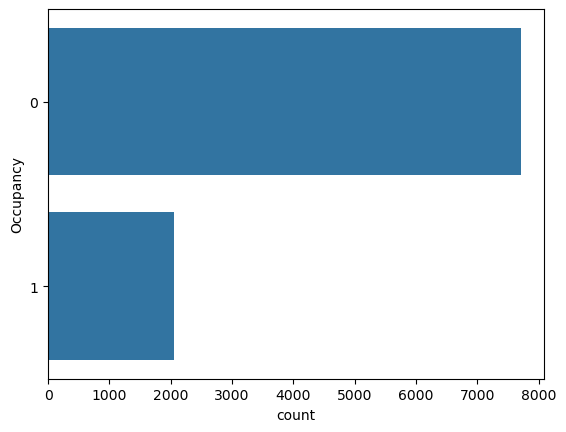

In [26]:
sns.countplot(y='Occupancy',data=df)
print(df['Occupancy'].value_counts())

In [27]:
df.drop(['year','Month'],axis=1,inplace=True)

In [28]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date,Hours,Minutes,Seconds
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1,11,14,48,0
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1,11,14,49,0
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1,11,14,50,0
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1,11,14,51,0
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1,11,14,51,59


In [29]:
x=df.drop('Occupancy',axis=1)
y=df['Occupancy']

In [30]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=42,stratify=y)

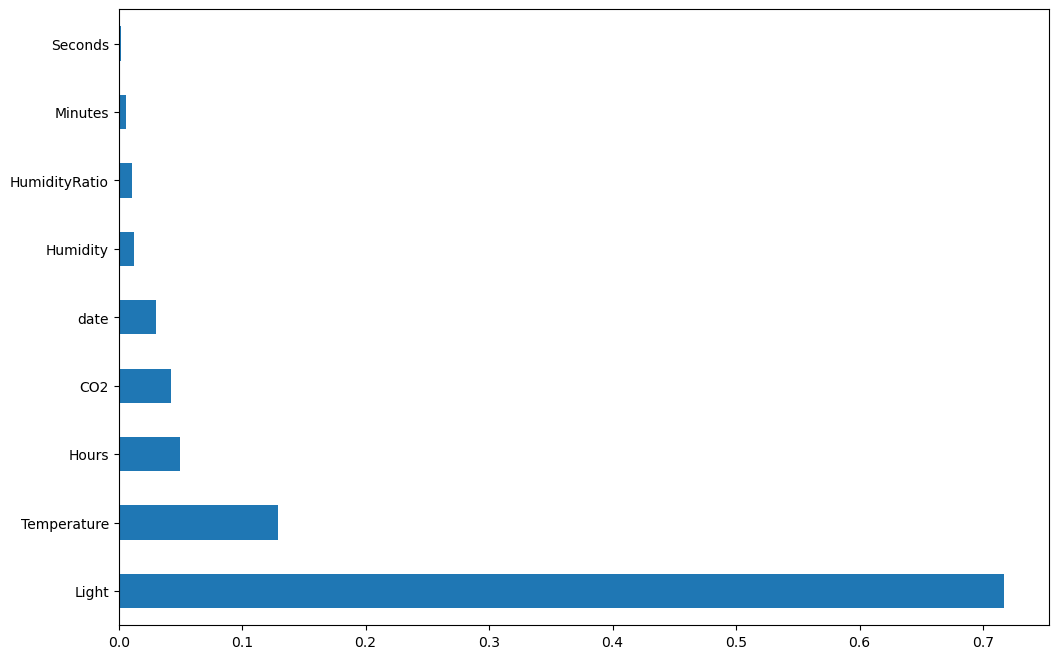

In [34]:
x_scaled = pd.DataFrame(x_scaled, columns=['Temperature','Humidity','Light','CO2','HumidityRatio','date','Hours','Minutes','Seconds'])  # Replace with actual feature names

# Fit the model
selection = ExtraTreesRegressor()
selection.fit(x_scaled, y)

# Plot feature importances
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=x_scaled.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

<Axes: >

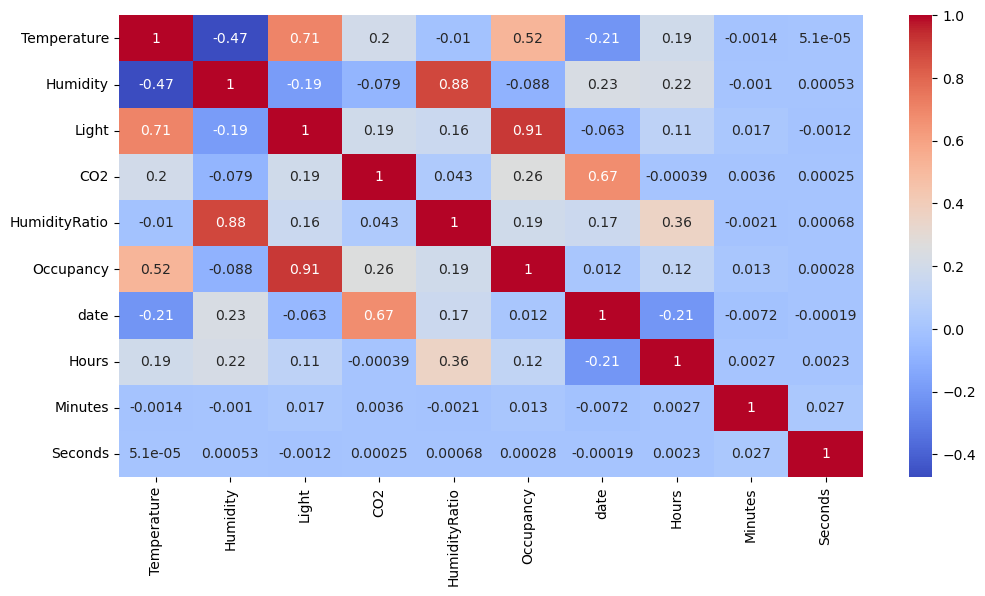

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [35]:
x_train.shape

(7801, 9)

In [36]:
x_test.shape

(1951, 9)

In [37]:
y_train.shape

(7801,)

In [38]:
y_test.shape

(1951,)

In [39]:
log=LogisticRegression()
log=log.fit(x_train,y_train)
log_pred=log.predict(x_test)


rf=RandomForestClassifier()
rf=rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

log_acc=accuracy_score(y_test,log_pred)
rf_acc=accuracy_score(y_test,rf_pred)
print(f"Log accuracy :{log_acc}")
print(f"RF accuracy :{rf_acc}")

print("LOG",classification_report(y_test,log_pred))
print("RF",classification_report(y_test,rf_pred))

Log accuracy :0.9933367503844183
RF accuracy :0.9958995386981035
LOG               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1541
           1       0.98      0.99      0.98       410

    accuracy                           0.99      1951
   macro avg       0.99      0.99      0.99      1951
weighted avg       0.99      0.99      0.99      1951

RF               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1541
           1       0.99      0.99      0.99       410

    accuracy                           1.00      1951
   macro avg       0.99      0.99      0.99      1951
weighted avg       1.00      1.00      1.00      1951



In [40]:
log_pred_train=log.predict(x_train)
log_pred_test=log.predict(x_test)
print('Training Accuracy :',accuracy_score(y_train,log_pred_train))
print(40 * '*')
print('Testing Accuracy :',accuracy_score(y_test,log_pred_test))

Training Accuracy : 0.9930778105371106
****************************************
Testing Accuracy : 0.9933367503844183


In [41]:
rf_pred_train=rf.predict(x_train)
rf_pred_test=rf.predict(x_test)
print('Training Accuracy :',accuracy_score(y_train,rf_pred_train))
print(40 * '*')
print('Testing Accuracy :',accuracy_score(y_test,rf_pred_test))

Training Accuracy : 1.0
****************************************
Testing Accuracy : 0.9958995386981035


In [42]:
print("LOG",confusion_matrix(y_test,log_pred))
print(40 * '*')
print("RF",confusion_matrix(y_test,rf_pred))

LOG [[1531   10]
 [   3  407]]
****************************************
RF [[1536    5]
 [   3  407]]


In [43]:
scores = cross_val_score(log, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9930778265083198


In [44]:
scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9950009034313968


In [45]:
y_probs = log.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

AUC Score: 0.9971130561402953


In [46]:
y_probs = rf.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

AUC Score: 0.9998717969009671
